Saving chip_dataset.csv to chip_dataset (8).csv


<ipython-input-7-e15784a56bf5>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y=metric, hue='Type', estimator='mean', ci=None)


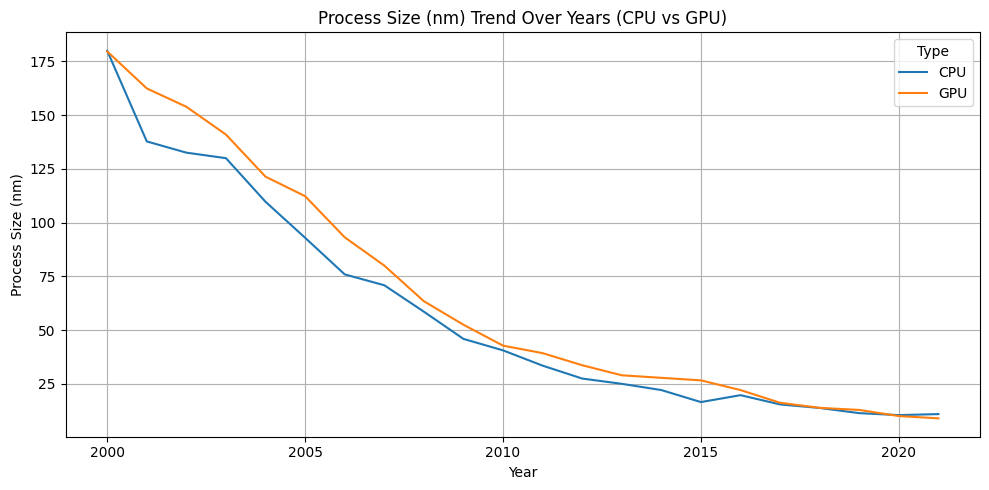

<ipython-input-7-e15784a56bf5>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y=metric, hue='Type', estimator='mean', ci=None)


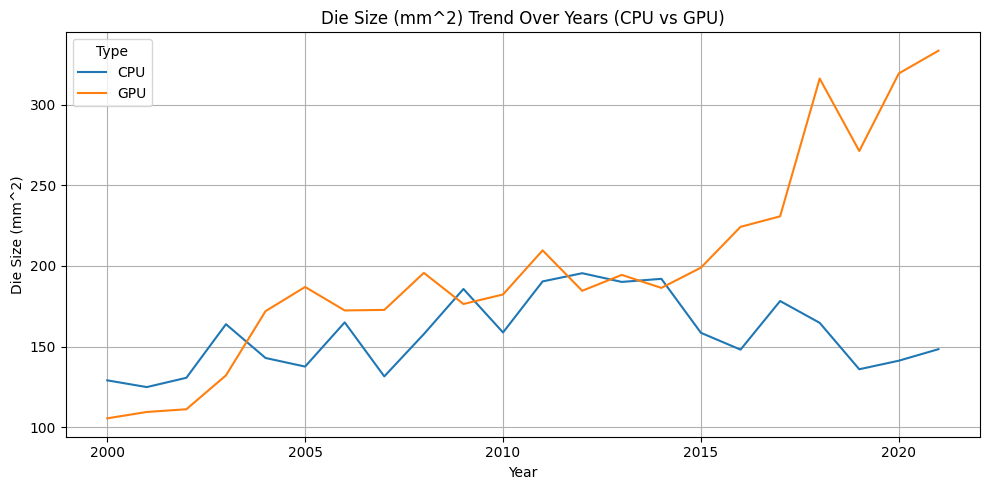

<ipython-input-7-e15784a56bf5>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y=metric, hue='Type', estimator='mean', ci=None)


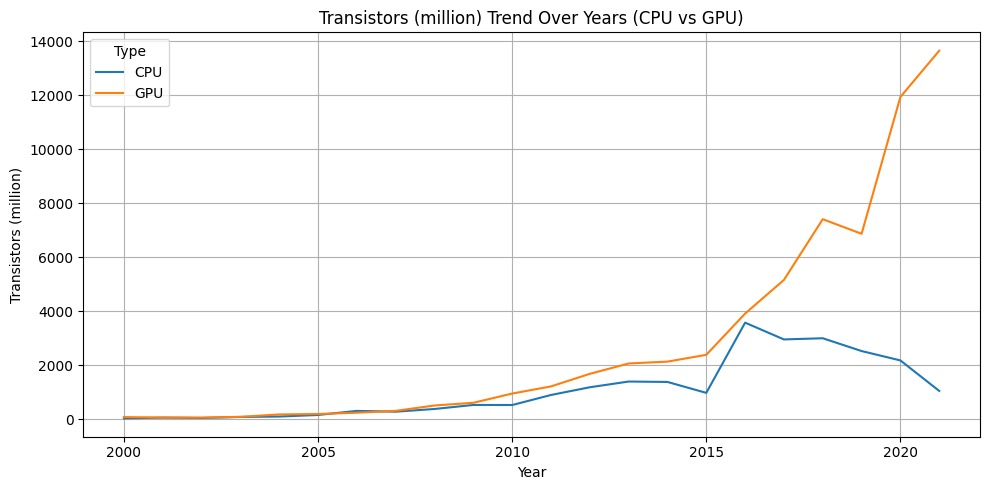

<ipython-input-7-e15784a56bf5>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y=metric, hue='Type', estimator='mean', ci=None)


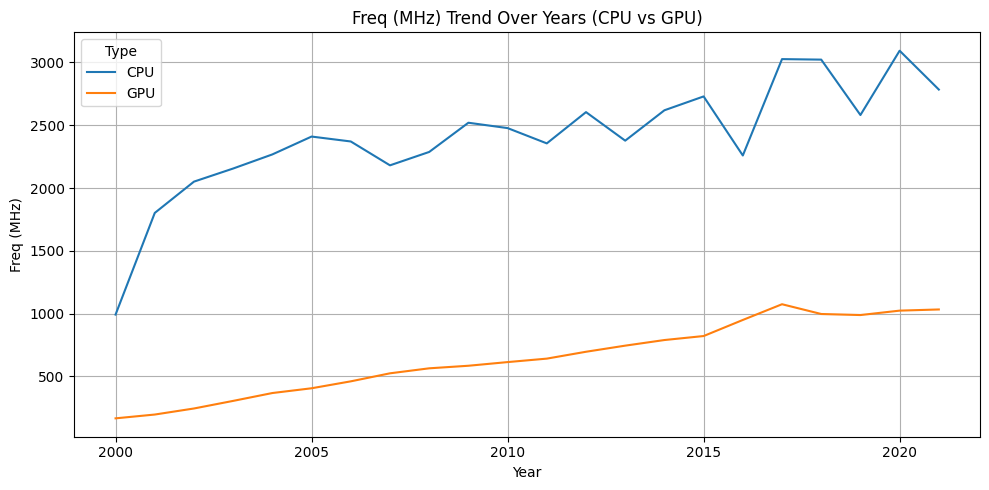

<ipython-input-7-e15784a56bf5>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Freq (MHz)', hue='Vendor', estimator='mean', ci=None)


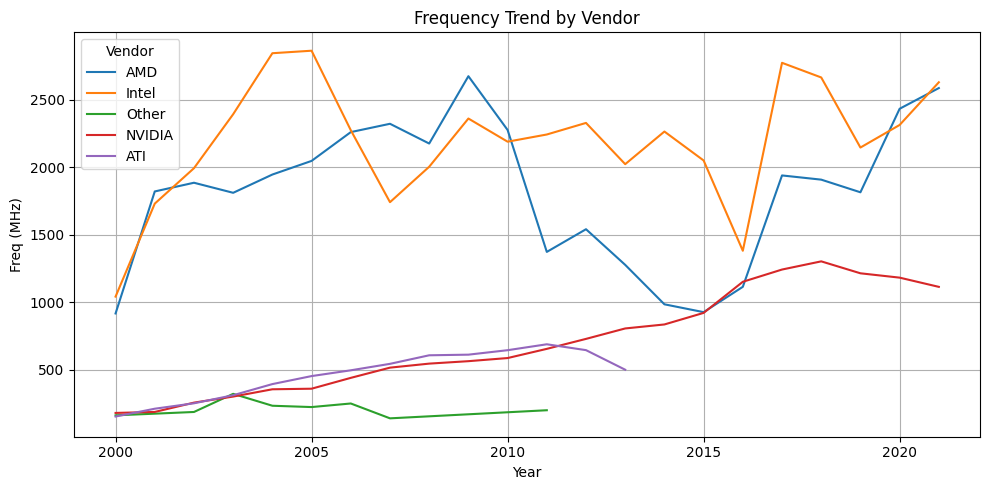

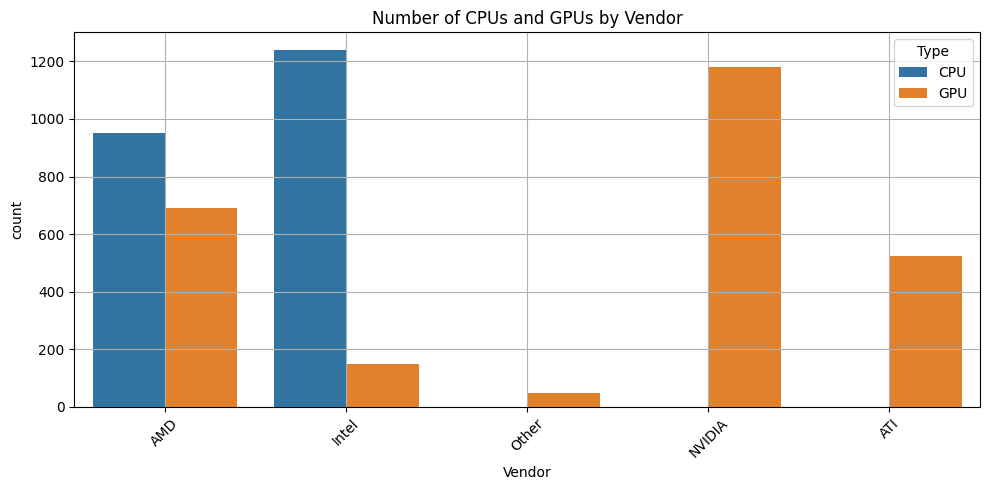

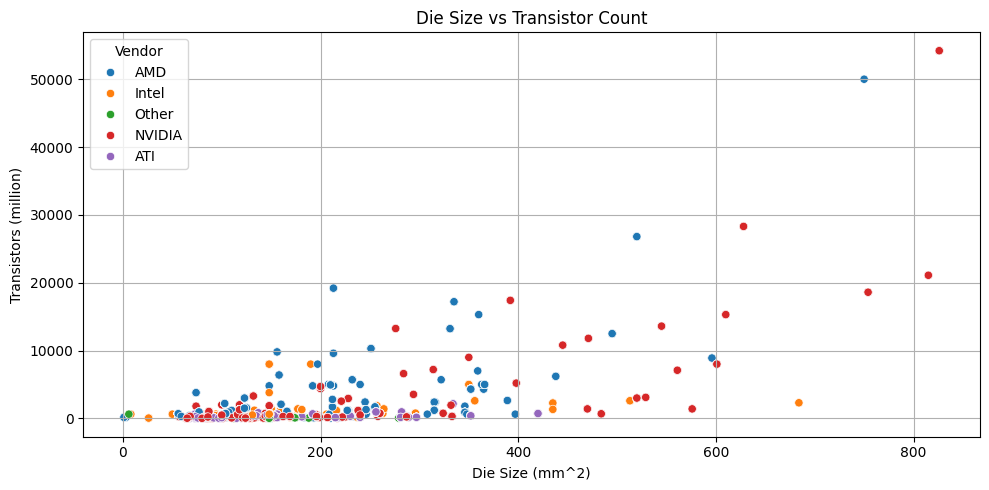

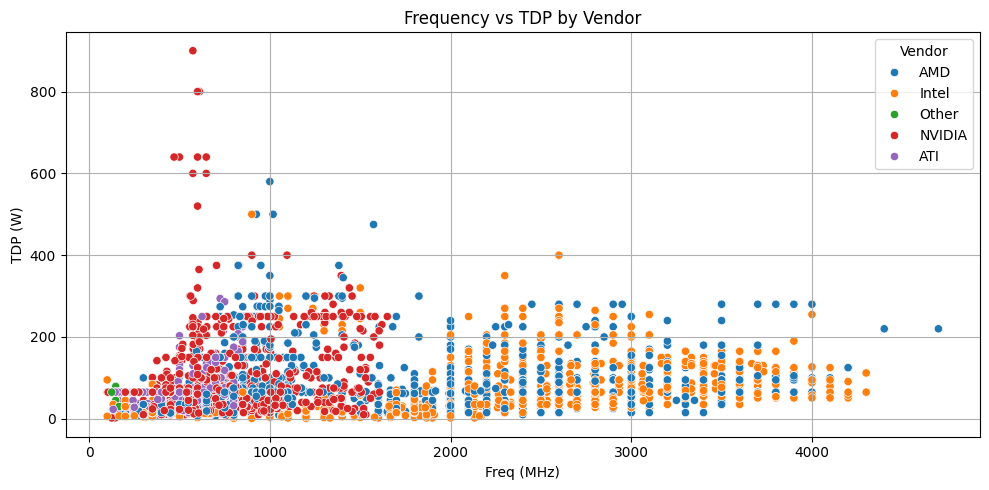

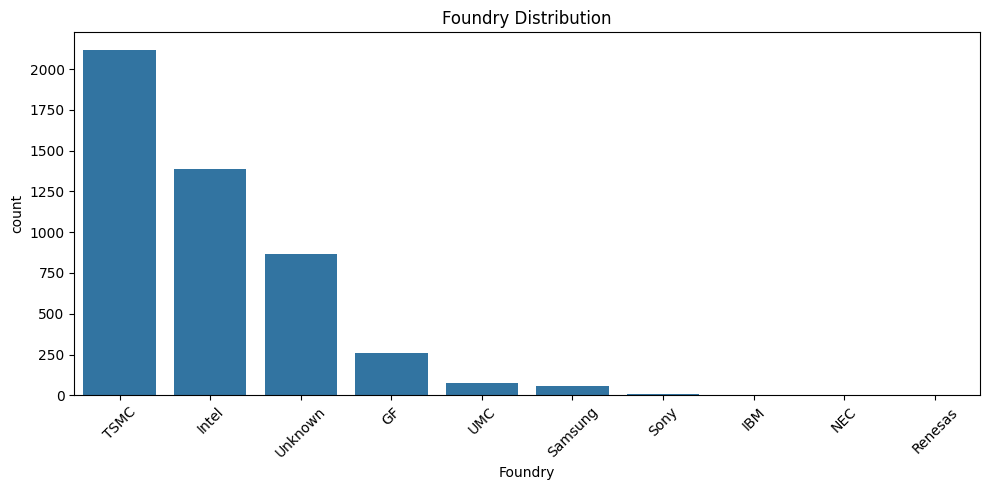

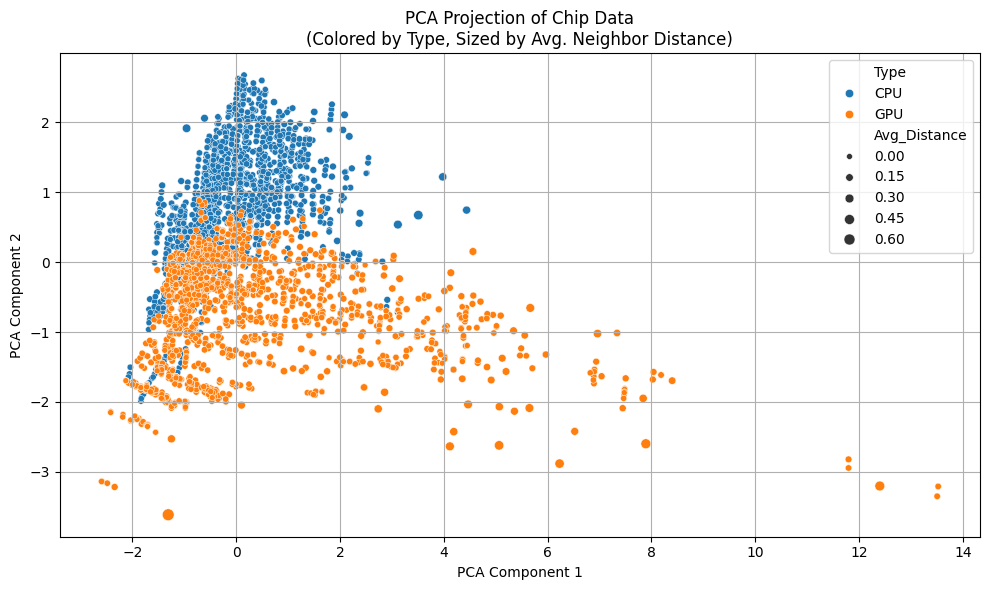

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model 1: Logistic Regression - Predict Vendor
              precision    recall  f1-score   support

         AMD       0.60      0.64      0.62       332
         ATI       0.44      0.50      0.47       101
       Intel       0.71      0.69      0.70       271
      NVIDIA       0.48      0.44      0.46       244
       Other       1.00      0.25      0.40         8

    accuracy                           0.58       956
   macro avg       0.65      0.50      0.53       956
weighted avg       0.59      0.58      0.58       956


Model 2: Random Forest - Predict CPU vs GPU
              precision    recall  f1-score   support

         CPU       1.00      1.00      1.00       441
         GPU       1.00      1.00      1.00       515

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956


Test Sample #1
Input: {'Process Size (nm)': 65.0, 'TDP (W)': 45.0, 'Die Size (mm^2)': 77.0,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# =============================================================
# Project: CPU & GPU performance analysis (clustering)
# Dataset: https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data
# Name	 : Basavaraj Patil Ajjayya
# Note   : This code is executed in Google code colab. Please upload the
#          chip_dataset.csv while executing this code.
# =============================================================

# STEP 1: Install required packages
!pip install -q seaborn matplotlib pandas scikit-learn

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
import numpy as np

# STEP 3: Upload CSV file
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# STEP 4: Preprocessing
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Year'] = df['Release Date'].dt.year
drop_cols = ['Unnamed: 0', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)
for col in ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']:
    df[col] = df[col].fillna(df[col].median())
df.dropna(subset=['Year'], inplace=True)

# STEP 5: EDA - CPU vs GPU trends
metrics = ['Process Size (nm)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x='Year', y=metric, hue='Type', estimator='mean', ci=None)
    plt.title(f"{metric} Trend Over Years (CPU vs GPU)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Vendor-wise frequency trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Freq (MHz)', hue='Vendor', estimator='mean', ci=None)
plt.title("Frequency Trend by Vendor")
plt.grid(True)
plt.tight_layout()
plt.show()

# Count of CPUs and GPUs per vendor
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Vendor', hue='Type')
plt.title("Number of CPUs and GPUs by Vendor")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Die Size vs Transistors
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Die Size (mm^2)', y='Transistors (million)', hue='Vendor')
plt.title("Die Size vs Transistor Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Frequency vs TDP
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Freq (MHz)', y='TDP (W)', hue='Vendor')
plt.title("Frequency vs TDP by Vendor")
plt.grid(True)
plt.tight_layout()
plt.show()

# Foundry Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Foundry', order=df['Foundry'].value_counts().index)
plt.title("Foundry Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =============================================================
# Clustering using PCA + Distance-Based Grouping
# =============================================================

# STEP 6: Feature extraction + PCA
features = ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# STEP 7: Distance-based grouping using 3-NN
nbrs = NearestNeighbors(n_neighbors=3).fit(X_pca)
distances, _ = nbrs.kneighbors(X_pca)
df['Avg_Distance'] = distances.mean(axis=1)

# STEP 8: Visualization of projected chip space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Type'], size=df['Avg_Distance'], palette='tab10')
plt.title("PCA Projection of Chip Data\n(Colored by Type, Sized by Avg. Neighbor Distance)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================================================
# Supervised Learning: Predicting Vendor and Type (CPU vs GPU)
# =============================================================

# Encode 'Vendor' and 'Type'
df_clean = df.dropna(subset=['Vendor', 'Type'])
le_vendor = LabelEncoder()
le_type = LabelEncoder()
df_clean['Vendor_encoded'] = le_vendor.fit_transform(df_clean['Vendor'])
df_clean['Type_encoded'] = le_type.fit_transform(df_clean['Type'])

# -------- Model 1: Predict Vendor --------
X1 = df_clean[features]
y1 = df_clean['Vendor_encoded']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train1, y_train1)
y_pred1 = lr1.predict(X_test1)

print("\nModel 1: Logistic Regression - Predict Vendor")
print(classification_report(y_test1, y_pred1, target_names=le_vendor.classes_))

# -------- Model 2: Predict CPU vs GPU --------
X2 = df_clean[features]
y2 = df_clean['Type_encoded']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)
y_pred2 = rf2.predict(X_test2)

print("\nModel 2: Random Forest - Predict CPU vs GPU")
print(classification_report(y_test2, y_pred2, target_names=le_type.classes_))

# =============================================================
# TEST THE MODELS USING SAMPLE INPUTS FROM DATASET
# =============================================================

# Select clean test points (with no missing data)
test_samples = pd.DataFrame([
    {
        'Process Size (nm)': 65.0,
        'TDP (W)': 45.0,
        'Die Size (mm^2)': 77.0,
        'Transistors (million)': 122.0,
        'Freq (MHz)': 2200.0
    },
    {
        'Process Size (nm)': 14.0,
        'TDP (W)': 35.0,
        'Die Size (mm^2)': 192.0,
        'Transistors (million)': 4800.0,
        'Freq (MHz)': 3200.0
    }
])

# Apply same scaling as used in model training
test_scaled = scaler.transform(test_samples)

# Predict Vendor (Model 1)
vendor_preds = lr1.predict(test_scaled)
vendor_labels = le_vendor.inverse_transform(vendor_preds)

# Predict CPU/GPU Type (Model 2)
type_preds = rf2.predict(test_scaled)
type_labels = le_type.inverse_transform(type_preds)

# Show predictions
for i, sample in test_samples.iterrows():
    print(f"\nTest Sample #{i+1}")
    print(f"Input: {sample.to_dict()}")
    print(f"Predicted Vendor: {vendor_labels[i]}")
    print(f"Predicted Type  : {type_labels[i]}")

